# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [32]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Howar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")


None


In [34]:
# Create a newsapi client

from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)


In [80]:
# Fetch the Bitcoin news articles

bitcoin_headlines = newsapi.get_everything(q="bitcoin",language="en",page_size=100,sort_by="relevancy")

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")


Total articles about Bitcoin: 9052


In [36]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum",language="en",page_size=100,sort_by="relevancy")

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")



Total articles about Ethereum: 1813


In [37]:
# Create the Bitcoin sentiment scores DataFrame
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)
bitcoin_df = create_df(bitcoin_headlines["articles"], "en")
ethereum_df =create_df(ethereum_headlines["articles"], "en")


bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()



,date,text,compound,positive,negative,neutral
0,2021-02-08,Elon Musks cryptocurrency hype was more than j...,0.3182,0.091,0.000,0.909
1,2021-02-09,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.000,0.929
2,2021-02-09,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.038,0.962
3,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944
4,2021-02-08,"Today in an SEC filing, Tesla disclosed that i...",0.6597,0.137,0.000,0.863


In [38]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,2021-01-28,Coinbase plans to go public by way of a direct...,0.0000,0.000,0.000,1.000
2,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000
3,2021-02-03,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000
4,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970


In [39]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.150370,0.065670,0.027223,0.907085
std,0.383227,0.070455,0.051505,0.082806
min,-0.844200,0.000000,0.000000,0.645000
25%,0.000000,0.000000,0.000000,0.855000
50%,0.025800,0.056000,0.000000,0.925500
75%,0.440400,0.099000,0.048500,0.993250
max,0.921700,0.353000,0.227000,1.000000


In [40]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,92.000000,92.000000,92.000000,92.000000
mean,0.165228,0.068054,0.027533,0.904391
std,0.385101,0.078919,0.048754,0.088556
min,-0.709600,0.000000,0.000000,0.667000
25%,0.000000,0.000000,0.000000,0.855000
50%,0.000000,0.053000,0.000000,0.918000
75%,0.493900,0.109500,0.060000,1.000000
max,0.900100,0.333000,0.175000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest positive score of .19 vs .16 for ETH

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound of .92 vs .90 for ETH

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive of .35 vs Eth .33. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [41]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [42]:
# Expand the default stopwords list if necessary


In [46]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    #convert to lower and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw]
            
    return tokens


bitcoin_tokens = bitcoin_df.copy()



In [47]:
# Create a new tokens column for bitcoin


tokenized = []
for i in bitcoin_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_text'] = tokens_df
bitcoin_tokens.head()

,date,text,compound,positive,negative,neutral,tokens_text
0,2021-02-08,Elon Musks cryptocurrency hype was more than j...,0.3182,0.091,0.000,0.909,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,2021-02-09,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.000,0.929,"[tesla, led, elon, musk, confirmed, purchased,..."
2,2021-02-09,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.038,0.962,"[brief, moment, sunday, tesla, said, invested,..."
3,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,2021-02-08,"Today in an SEC filing, Tesla disclosed that i...",0.6597,0.137,0.000,0.863,"[today, sec, filing, tesla, disclosed, ha, acq..."


In [49]:
# Create a new tokens column for ethereum
ethereum_tokens = ethereum_df.copy()
tokenized_eth = []
for i in ethereum_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_text'] = tokens_df_eth
ethereum_tokens.head()


,date,text,compound,positive,negative,neutral,tokens_text
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,2021-01-28,Coinbase plans to go public by way of a direct...,0.0000,0.000,0.000,1.000,"[coinbase, plan, go, public, way, direct, list..."
2,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000,"[file, photo, representation, ethereum, virtua..."
3,2021-02-03,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representation, et..."
4,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,"[first, christies, auction, digital, artwork, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [52]:
from collections import Counter
from nltk import ngrams

In [56]:
# Generate the Bitcoin N-grams where N=2


all_bitcoin_words = []
for text in bitcoin_tokens['tokens_text']:
    for word in text:
        all_bitcoin_words.append(word)

all_eth_words = []
for text in ethereum_tokens['tokens_text']:
    for word in text:
        all_eth_words.append(word)


def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_15.items()), columns=['Bigram', 'Count'])

bigram_counter(all_bitcoin_words)

,Bigram,Count
0,"(char, reuters)",16
1,"(elon, musk)",14
2,"(record, high)",9
3,"(reuters, bitcoin)",9
4,"(billion, bitcoin)",8
5,"(photo, representation)",7
6,"(representation, virtual)",7
7,"(virtual, currency)",7
8,"(tesla, inc)",6
9,"(currency, bitcoin)",6


In [57]:
# Generate the Ethereum N-grams where N=2
bigram_counter(all_eth_words)

,Bigram,Count
0,"(char, reuters)",13
1,"(record, high)",13
2,"(feb, reuters)",10
3,"(char, new)",10
4,"(new, york)",10
5,"(graphic, world)",8
6,"(world, fx)",8
7,"(fx, rate)",8
8,"(york, reuters)",7
9,"(char, dollar)",7


In [58]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    Counter_words = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(Counter_words.items()), columns=['Word', 'Count'])

In [59]:
# Get the top 10 words for Bitcoin
token_count(all_bitcoin_words)

,Word,Count
0,char,92
1,bitcoin,72
2,reuters,41
3,ha,23
4,tesla,20
5,cryptocurrency,19
6,high,17
7,elon,15
8,market,15
9,said,14


In [60]:
# Get the top 10 words for Ethereum
token_count(all_eth_words)

,Word,Count
0,char,91
1,reuters,44
2,bitcoin,29
3,cryptocurrency,23
4,new,23
5,high,23
6,ethereum,20
7,dollar,19
8,record,17
9,ha,15


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

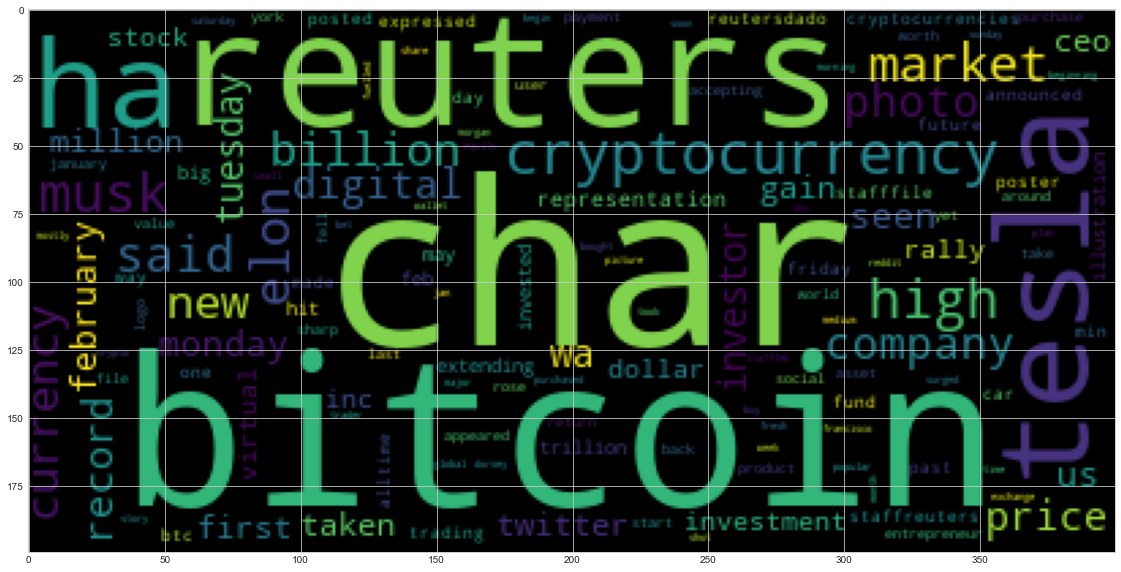

In [63]:
# Generate the Bitcoin word cloud
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

bitcoin_words = processed_text(all_bitcoin_words)
wc = WordCloud(collocations=False).generate(bitcoin_words)
fig = plt.figure()
plt.imshow(wc)
plt.show()

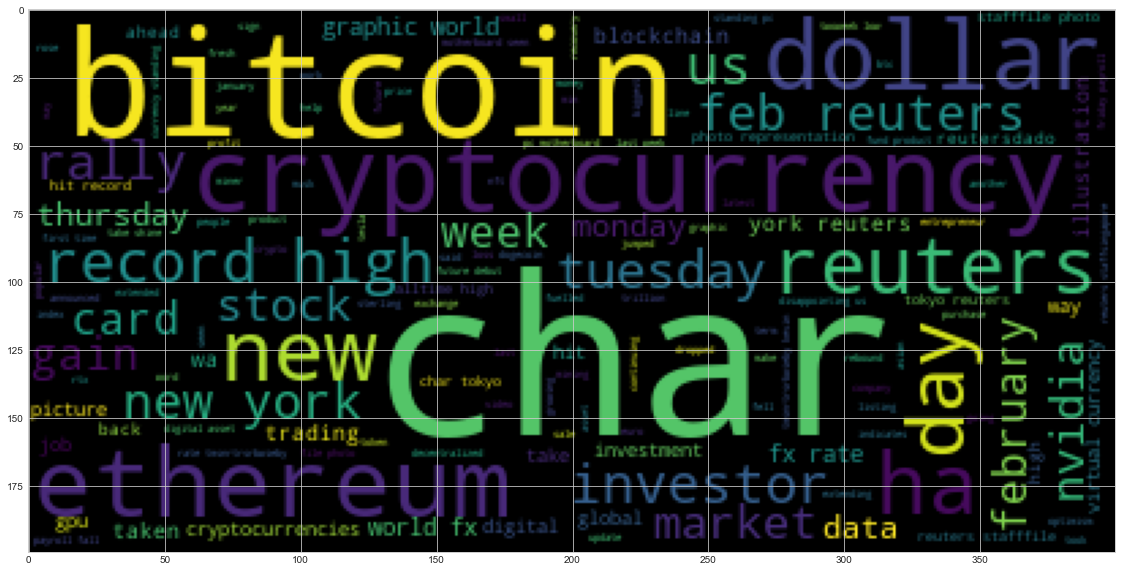

In [64]:
# Generate the Ethereum word cloud

eth_words = processed_text(all_eth_words)
fig = plt.figure()
wc = WordCloud().generate(eth_words)
plt.imshow(wc)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [67]:
import spacy
from spacy import displacy

In [68]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [69]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [70]:
# Concatenate all of the bitcoin text together
bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)
    
big_string_bitcoin = ' '.join(bitcoin_sent)

In [74]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(big_string_bitcoin)
bitcoin_doc.user_data['title'] = 'Bitcoin NER'
displacy.render(bitcoin_doc, style='ent')

# Add a title to the document


In [75]:
# List all Entities
for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
Today DATE
SEC ORG
Tesla ORG
$1.5 billion MONEY
first ORDINAL
more than a decade later DATE
21.11 MONEY
Jan. 28 DATE
70% PERCENT
Bitcoin PERSON
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
Bitcoin PERSON
this morning TIME
over $50,000 MONEY
Jack Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
Francis Suarez PERSON
Friday DATE
Elon Musk PERSON
Twitter PRODUCT
Musk PERSON
New York GPE
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
Cryptocurrencies ORG
handshakes over millions CARDINAL
today DATE
2012 DATE
Alabama

---

## Ethereum NER

In [76]:
# Concatenate all of the bitcoin text together
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)
    
big_string_eth = " ".join(eth_sent)

In [77]:
# Run the NER processor on all of the text
eth_doc = nlp(big_string_eth)
eth_doc.user_data['title'] = 'Ethereum Named Entity Recogition'
displacy.render(eth_doc, style='ent')

In [79]:
# List all Entities

for ent in eth_doc.ents:
    print (ent, ent.label_)

GeForce ORG
3060 GPE
GPU ORG
today DATE
2012 DATE
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
Ethereum ORG
February 3, 2018 DATE
LONDON GPE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Friday DATE
Thyagaraju Adinarayan PERSON
Anna Irrera PERSON
Musk PERSON
Dogecoin GPE
Dogecoin GPE
nearly 68% PERCENT
$0.054496
 MONEY
NEW YORK GPE
Reuters ORG
$245 million MONEY
last